In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [85]:
data = pd.read_csv("../data/synthetic_real_data.csv")
test_data = pd.read_csv("../data/test_modified.csv")

In [86]:
data.columns

Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'Steel_Plate_Thickness', 'Edges_Index', 'Empty_Index', 'Square_Index',
       'Outside_X_Index', 'Edges_X_Index', 'Edges_Y_Index',
       'Outside_Global_Index', 'LogOfAreas', 'Log_X_Index', 'Log_Y_Index',
       'Orientation_Index', 'Luminosity_Index', 'SigmoidOfAreas',
       'TypeOfSteel', 'Fault_class'],
      dtype='object')

In [112]:
y = data.Fault_class
X = data.iloc[:,:-1]

In [113]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.utils import to_categorical
normalisation = MinMaxScaler()
X_train = normalisation.fit_transform(X)
X_test = normalisation.fit_transform(test_data.iloc[:,1:])
y_train = to_categorical(y)

In [114]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Simple basic neural network

In [124]:
adam = Adam(learning_rate=8e-5)

basic_model = Sequential()
basic_model.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
basic_model.add(Dense(1024, activation='relu'))
basic_model.add(Dropout(0.3))
basic_model.add(Dense(256, activation='relu'))
basic_model.add(Dense(64, activation='relu'))
basic_model.add(Dense(16, activation='relu'))
basic_model.add(Dense(7, activation='softmax'))

basic_model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['acc'])

In [125]:
basic_model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_101 (Dense)           (None, 512)               13824     
                                                                 
 dense_102 (Dense)           (None, 1024)              525312    
                                                                 
 dropout_6 (Dropout)         (None, 1024)              0         
                                                                 
 dense_103 (Dense)           (None, 256)               262400    
                                                                 
 dense_104 (Dense)           (None, 64)                16448     
                                                                 
 dense_105 (Dense)           (None, 16)                1040      
                                                                 
 dense_106 (Dense)           (None, 7)               

In [126]:
earlyStopping = EarlyStopping(monitor='val_loss',
                             patience=5,
                             restore_best_weights=True)
history = basic_model.fit(X_train, y_train, epochs=300, batch_size=32, validation_split=0.2, callbacks=[earlyStopping])

Epoch 1/300
772/772 [==============================] - 8s 9ms/step - loss: 1.3761 - acc: 0.4482 - val_loss: 1.2225 - val_acc: 0.5158
Epoch 2/300
772/772 [==============================] - 7s 9ms/step - loss: 1.2158 - acc: 0.5095 - val_loss: 1.1934 - val_acc: 0.5181
Epoch 3/300
772/772 [==============================] - 8s 10ms/step - loss: 1.1881 - acc: 0.5212 - val_loss: 1.1756 - val_acc: 0.5262
Epoch 4/300
772/772 [==============================] - 8s 10ms/step - loss: 1.1743 - acc: 0.5284 - val_loss: 1.1637 - val_acc: 0.5288
Epoch 5/300
772/772 [==============================] - 8s 10ms/step - loss: 1.1609 - acc: 0.5315 - val_loss: 1.1546 - val_acc: 0.5380
Epoch 6/300
772/772 [==============================] - 8s 10ms/step - loss: 1.1512 - acc: 0.5383 - val_loss: 1.1467 - val_acc: 0.5417
Epoch 7/300
772/772 [==============================] - 8s 10ms/step - loss: 1.1407 - acc: 0.5433 - val_loss: 1.1338 - val_acc: 0.5425
Epoch 8/300
772/772 [==============================] - 8s 10ms/s

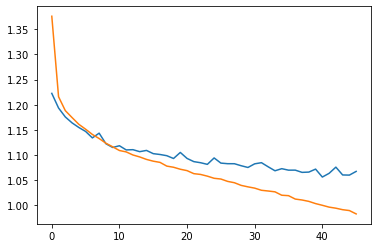

In [132]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss']);

In [133]:
predictions = first_model.predict(X_test)

401/401 [==============================] - 1s 1ms/step


In [135]:
submission = pd.read_csv("../data/submission_basic_model.csv")
submission.id = test_data.id
submission.iloc[:,1:] = predictions
submission.to_csv("../data/submission_synthetic_data_nn_deep.csv", index=False)